In [1]:
import pandas as pd
import numpy as np
import math


In [2]:
data = pd.read_csv('/Users/karanbhutani/Downloads/download.csv')

## Import necessary libraries and read the provided dataset (online_sales.csv) and check the top 5 and random 5 samples of the dataframe.

## top 5 samples

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## random samples

In [4]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68949,541886,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,24,1/24/11 11:21,3.39,15039.0,United Kingdom
66401,541793,22222,CAKE PLATE LOVEBIRD WHITE,12,1/21/11 13:13,1.95,13969.0,United Kingdom
187984,553013,22329,ROUND CONTAINER SET OF 5 RETROSPOT,2,5/12/11 18:19,3.29,NaN,United Kingdom
72327,542239,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,1/26/11 14:35,2.95,17786.0,United Kingdom
39864,539708,22945,CHRISTMAS METAL TAGS ASSORTED,1,12/21/10 12:18,11.02,NaN,United Kingdom


## Check info of the dataframe and write your observations. Comment on data types and shape of the datase

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240007 entries, 0 to 240006
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    240007 non-null  object 
 1   StockCode    240007 non-null  object 
 2   Description  239106 non-null  object 
 3   Quantity     240007 non-null  int64  
 4   InvoiceDate  240007 non-null  object 
 5   UnitPrice    240007 non-null  float64
 6   CustomerID   172782 non-null  float64
 7   Country      240007 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 14.6+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,240007.000000,240007.000000,172782.000000
mean,9.277646,5.124265,15274.819941
std,223.061608,119.992279,1725.093177
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13842.000000
50%,3.000000,2.100000,15132.000000
75%,10.000000,4.210000,16814.000000
max,74215.000000,38970.000000,18287.000000


In [7]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
240002,False,False,False,False,False,False,False,False
240003,False,False,False,False,False,False,False,False
240004,False,False,False,False,False,False,False,False
240005,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      901
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67225
Country            0
dtype: int64

In [9]:
data.shape



(240007, 8)

## Observations
The dataset Online_sales has 240007 rows and 8 features. The features include InvoiceNo, StockCode, Description	Quantity, InvoiceData, UnitPrice,CustomerID	and Country. Dataset has the following datatypes - float, int, and object.
On checking through the data we can see that it has some null values as well, in Description and CustomerID respectively.

In [10]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      901
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67225
Country            0
dtype: int64

In [11]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [12]:
missing_value_data.sort_values('percent_missing', inplace=True)

In [13]:
missing_value_data

,column_name,percent_missing
InvoiceNo,InvoiceNo,0.000000
StockCode,StockCode,0.000000
Quantity,Quantity,0.000000
InvoiceDate,InvoiceDate,0.000000
UnitPrice,UnitPrice,0.000000
Country,Country,0.000000
Description,Description,0.375406
CustomerID,CustomerID,28.009600


In [14]:
data.dropna(inplace=True, axis=0)

In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [16]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
import seaborn as sns

<AxesSubplot:>

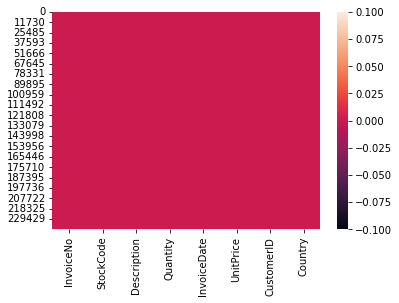

In [18]:
sns.heatmap(data.isnull())

## Observation
On skimming throught the data, we can clearly see that it has some null values and to make the data continous and remove ambiguity we can drop the rows containing null values.

## 4. Check the statistical summary of the dataset.

In [19]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,172782.000000,172782.000000,172782.000000
mean,12.244835,3.793566,15274.819941
std,257.898235,101.069930,1725.093177
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13842.000000
50%,5.000000,1.950000,15132.000000
75%,12.000000,3.750000,16814.000000
max,74215.000000,38970.000000,18287.000000


In [20]:
data.median()

/var/folders/qy/tnt48kyn6cv4_500lyr1jtcw0000gn/T/ipykernel_16368/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Quantity          5.00
UnitPrice         1.95
CustomerID    15132.00
dtype: float64

In [21]:
data.Quantity.quantile([0.25,0.5,0.75])

0.25     2.0
0.50     5.0
0.75    12.0
Name: Quantity, dtype: float64

In [22]:
data.UnitPrice.quantile([0.25,0.5,0.75])



0.25    1.25
0.50    1.95
0.75    3.75
Name: UnitPrice, dtype: float64

In [23]:
data.CustomerID .quantile([0.25,0.5,0.75])

0.25    13842.0
0.50    15132.0
0.75    16814.0
Name: CustomerID, dtype: float64

## 5. Drop the instances having quantity less than zero.

In [24]:
data.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [25]:
value_less_than = data[(data['Quantity'] < 0)].index

In [26]:
value_less_than

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            238583, 239026, 239065, 239209, 239210, 239211, 239549, 239550,
            239551, 239552],
           dtype='int64', length=4107)

In [27]:
data.drop(value_less_than, inplace =True)

In [28]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 6. Check unique values of the country and report the name of the country that has the highest number of instances/rows

In [29]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'Unit'], dtype=object)

In [30]:
data.Country.mode()

0    United Kingdom
Name: Country, dtype: object

In [31]:
import operator as op

In [32]:
country_names = data.Country

In [33]:
country_names

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
240002    United Kingdom
240003    United Kingdom
240004    United Kingdom
240005    United Kingdom
240006              Unit
Name: Country, Length: 168675, dtype: object

In [34]:
def countX(countries, x):
    return countries.count(x)
 
countries = data.Country.values.tolist()
x = 'United Kingdom'
print('{} has occurred {} times'.format(x,countX(countries, x)))

United Kingdom has occurred 150046 times


In [35]:
countries 

['United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 

In [36]:
data.Country.values

array(['United Kingdom', 'United Kingdom', 'United Kingdom', ...,
       'United Kingdom', 'United Kingdom', 'Unit'], dtype=object)

In [37]:
import operator as op
countries = data.Country.values.tolist()
x = 'United Kingdom'
print(f"{x} has occured {op.countOf(countries, x)} times")

United Kingdom has occured 150046 times


## 7. Create a new column with the name as ‘sales’ having total sales. The total sales is defined as Quantity*UnitPrice

In [38]:
data['sales']=data['Quantity']*data['UnitPrice'] 

In [39]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


## 8. Report the top 5 countries in terms of sales.

In [40]:
data.nlargest(5, 'sales', keep='first')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/11 15:28,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,5/3/11 13:46,8142.75,16029.0,United Kingdom,8142.75
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/11 12:55,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749.0,United Kingdom,6539.40


In [41]:
data.sales.mean()

23.05600557877644

## 9. Report the top 5 products which bring the highest sales. Use StockCode for product information. 

In [42]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [43]:
dataframe1 = data.nlargest(10,'sales', keep='first')

In [44]:
dataframe1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/11 15:28,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,5/3/11 13:46,8142.75,16029.0,United Kingdom,8142.75
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/11 12:55,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749.0,United Kingdom,6539.40
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,1/11/11 12:55,2.55,15749.0,United Kingdom,4921.50
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,4/18/11 13:20,2.40,15749.0,United Kingdom,4632.00
52772,540818,48185,DOORMAT FAIRY CAKE,670,1/11/11 12:57,6.75,15749.0,United Kingdom,4522.50
160544,550461,48185,DOORMAT FAIRY CAKE,670,4/18/11 13:20,6.35,15749.0,United Kingdom,4254.50
52134,540689,22470,HEART OF WICKER LARGE,1284,1/11/11 8:43,3.21,17450.0,United Kingdom,4121.64


In [45]:
dataframe1.StockCode.unique()

array(['23166', '22502', 'POST', '21108', '85123A', '48185', '22470'],
      dtype=object)

## Convert the ‘InvoiceDate’ into a date format and report the month on which the maximum sales occur


In [49]:
dataframe1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/11 15:28,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,5/3/11 13:46,8142.75,16029.0,United Kingdom,8142.75
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/11 12:55,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749.0,United Kingdom,6539.40


In [50]:
dataframe1['month'] = pd.DatetimeIndex(dataframe1['InvoiceDate']).month


In [51]:
dataframe1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,month
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,77183.60,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/11 15:28,649.50,15098.0,United Kingdom,38970.00,6
173382,551697,POST,POSTAGE,1,5/3/11 13:46,8142.75,16029.0,United Kingdom,8142.75,5
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/11 12:55,2.10,15749.0,United Kingdom,6539.40,1
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749.0,United Kingdom,6539.40,4
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,1/11/11 12:55,2.55,15749.0,United Kingdom,4921.50,1
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,4/18/11 13:20,2.40,15749.0,United Kingdom,4632.00,4
52772,540818,48185,DOORMAT FAIRY CAKE,670,1/11/11 12:57,6.75,15749.0,United Kingdom,4522.50,1
160544,550461,48185,DOORMAT FAIRY CAKE,670,4/18/11 13:20,6.35,15749.0,United Kingdom,4254.50,4
52134,540689,22470,HEART OF WICKER LARGE,1284,1/11/11 8:43,3.21,17450.0,United Kingdom,4121.64,1


In [52]:
highest_sales =dataframe1.groupby(dataframe1.month)['sales'].sum().head(3)

In [54]:
highest_sales

month
1    97288.64
4    15425.90
5     8142.75
Name: sales, dtype: float64